In [1]:
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve
import matplotlib.pyplot as plt
import matplotlib
import pickle
import numpy as np
import pandas as pd

In [2]:
rnfseh = '/home/pietro/ctasoft/CTA/trained/ResNetFSE_2020-03-12_19-46/train-history'
rnfser = '/home/pietro/ctasoft/CTA/trained/ResNetFSE_2020-03-12_19-46/ResNetFSE_22_0.77850_0.72881.h5_test.csv'

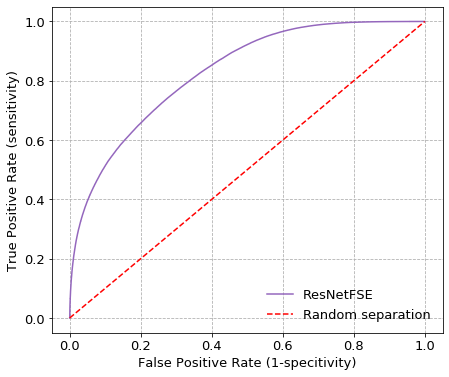

In [18]:
#history
rnfse_history = pickle.load(open(rnfseh, 'rb'))
#compute ROCs
rnfse_csv = pd.read_csv(rnfser)
fpr_rnfse, tpr_rnfse, _ = roc_curve(rnfse_csv['GroundTruth'], rnfse_csv['Predicted'])

epochs = 30

fig = plt.figure(figsize=(7, 6))

matplotlib.rcParams.update({'font.size': 13})
cmap = plt.get_cmap("tab10")
plt.plot(fpr_rnfse, tpr_rnfse, label='ResNetFSE', color=cmap(4))
plt.grid(b=True, which='major', linestyle='--')
plt.grid(b=True, which='minor', linestyle='--')
plt.xlabel('False Positive Rate (1-specitivity)')
plt.ylabel('True Positive Rate (sensitivity)')
plt.plot([0, 1], [0, 1], 'r--', label='Random separation')
plt.legend(loc='lower right', fancybox=True, framealpha=0.)

246820
245340


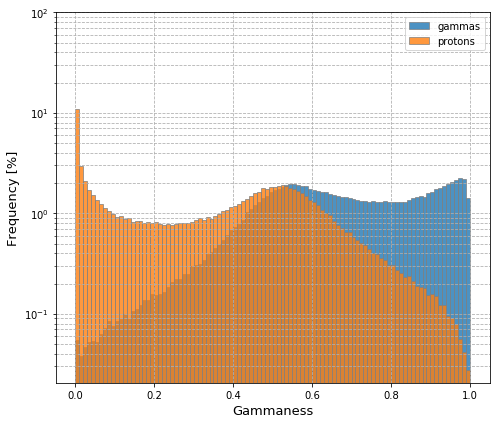

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm

rnfse_csv_g = rnfse_csv[rnfse_csv['GroundTruth'] == 1]
rnfse_csv_p = rnfse_csv[rnfse_csv['GroundTruth'] == 0]

g_count = rnfse_csv_g.shape[0]
p_count = rnfse_csv_p.shape[0]

print(g_count)
print(p_count)

fig = plt.figure(figsize=(7, 6))

plt.hist(rnfse_csv_g['Predicted'], bins=100, density = True, label='gammas', alpha = 0.8, edgecolor='gray', linewidth=0.9)
plt.hist(rnfse_csv_p['Predicted'], bins=100, density = True, label='protons', alpha = 0.8, edgecolor='gray', linewidth=0.9)
plt.yscale('log')
plt.ylim(top=100)
plt.xlabel('Gammaness', fontsize=13)
plt.ylabel('Frequency [%]', fontsize=13)
plt.legend(loc='upper right')
plt.grid(b=True, which='major', linestyle='--')
plt.grid(b=True, which='minor', linestyle='--')

fig.tight_layout()
plt.show()
fig.savefig('separation_best_probdistr.pdf', format='pdf', bbox_inches='tight', transparent=False)